In [1]:
#!pip3 install --force-reinstall Numpy==1.23.5 --user
!pip install statsmodels==0.13.2 --user
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
# from itertools import pairwise
from itertools import tee
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# This takes roughly 12 minutes
model_1 = KeyedVectors.load_word2vec_format(r"C:\Users\nhelw\Downloads\dutch-word-embeddings-master\dutch-word-embeddings-master\model.bin", binary=True)
print("model_1 loaded!")
model_2 = KeyedVectors.load_word2vec_format(r"C:\Users\nhelw\Downloads\320\combined-320.txt", binary=False)
print("model_2 loaded!") 

model_1 loaded!
model_2 loaded!


In [3]:
dataset = pd.read_csv(r"C:\Users\nhelw\Documents\dataset_clean_A.csv", sep=";")  # Importing the dataset
dataset_B = pd.read_csv(r"C:\Users\nhelw\Documents\dataset_clean_B.csv", sep=";")

In [4]:
def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [5]:
def cluster(model, dataset, VFT, similarity_cutoff, name):
    clusters = []
    for participant in range(len(dataset)):
        clusters.append([])
        attempt = dataset.loc[participant, VFT].split(", ")
        attempt = [x.lower() for x in attempt]
        attempt = [x for x in attempt if x in model]  # Get rid of all words not in word embeddings
        attempt = list(pairwise(attempt))  # Make pairs of all consecutive elements, with overlap. So [1,2,3,4] becomes [[1,2],[2,3],[3,4]]
        first_word = True
        cluster_nr = 0  # Iterator for the clusters of each participant
        for word in attempt:
            if first_word:  # If it is the first word that is also in the model then it gets added to the first cluster
                clusters[participant].append([word[0]])
                first_word = False
            similarity = model.similarity(word[0], word[1])
            if similarity > similarity_cutoff:
                clusters[participant][cluster_nr].append(word[1])
            else:
                cluster_nr += 1
                clusters[participant].append([word[1]])
        #clusters[participant] = [x for x in clusters[participant] if len(x)>1] # get rid of single word clusters

    with open(name, "w+") as my_csv:
        writer = csv.writer(my_csv, delimiter=',')
        writer.writerows(clusters)

    return clusters

In [6]:
def statistics(clusters):
    means = []
    switches = []
    ratio = []
    for participant in range(len(dataset)):
        if len(clusters[participant]) > 0: # if participant has clusters
            means.append(sum([len(x) - 1 for x in clusters[participant]]) / len(clusters[participant]))
#         else:
#             means.append(0)
        switches.append(len(clusters[participant])-1)
#         if switches[participant] > 0:  # Very hacky
        ratio.append(means[participant] / switches[participant])
#         else:
#             ratio.append(means[participant])
    return means, switches, ratio

In [7]:
print("model_1:")
print("Animals")
all_participants_clustered_animals = cluster(model_1, dataset, "CF_animals", 0.55, "model_1_animals_0.55.csv")
mean_cluster_sizes_animals_1, switches_animals_1, ratios_animals_1 = statistics(all_participants_clustered_animals)
print(" mcs:", np.mean(mean_cluster_sizes_animals_1), "\n",
     "switches:", np.mean(switches_animals_1), "\n",
     "ratio:", np.mean(ratios_animals_1))

print("Professions")
all_participants_clustered_professions = cluster(model_1, dataset, "CF_professions", 0.60, "model_1_profs_0.60.csv")
mean_cluster_sizes_professions_1, switches_professions_1, ratios_professions_1 = statistics(all_participants_clustered_professions)
print(" mcs:", np.mean(mean_cluster_sizes_professions_1), "\n",
     "switches:", np.mean(switches_professions_1), "\n",
     "ratio:", np.mean(ratios_professions_1))

print("")
print("model_2:")
print("Animals")
all_participants_clustered_animals = cluster(model_2, dataset, "CF_animals", 0.48, "model_2_animals_0.48.csv")
mean_cluster_sizes_animals_2, switches_animals_2, ratios_animals_2 = statistics(all_participants_clustered_animals)
print(" mcs:", np.mean(mean_cluster_sizes_animals_2), "\n",
     "switches:", np.mean(switches_animals_2), "\n",
     "ratio:", np.mean(ratios_animals_2))

print("Professions")
all_participants_clustered_professions = cluster(model_2, dataset, "CF_professions", 0.50, "model_2_profs_0.50.csv")
mean_cluster_sizes_professions_2, switches_professions_2, ratios_professions_2 = statistics(all_participants_clustered_professions)
print(" mcs:", np.mean(mean_cluster_sizes_professions_2), "\n",
     "switches:", np.mean(switches_professions_2), "\n",
     "ratio:", np.mean(ratios_professions_2))


model_1:
Animals
 mcs: 0.4107022614845615 
 switches: 16.902439024390244 
 ratio: 0.026441963568452048
Professions
 mcs: 0.24323425032269572 
 switches: 12.634146341463415 
 ratio: 0.02426325496175359

model_2:
Animals
 mcs: 0.8211047743483749 
 switches: 13.75609756097561 
 ratio: 0.07366865126726775
Professions
 mcs: 0.546082000550399 
 switches: 10.609756097560975 
 ratio: 0.060321464405697585


In [8]:
# Check which words do not exist in the models
# These words either have to change to accomodate the model or need another solution
missing_1a = []
for participant in range(len(dataset)):
    attempt = dataset.loc[participant, "CF_animals"].split(", ")
    attempt = [x.lower() for x in attempt]
    for x in attempt:
        if x not in model_1:
            missing_1a.append(x)

missing_1p = []
for participant in range(len(dataset)):
    attempt = dataset.loc[participant, "CF_professions"].split(", ")
    attempt = [x.lower() for x in attempt]
    for x in attempt:
        if x not in model_1:
            missing_1p.append(x)

missing_2a = []
for participant in range(len(dataset)):
    attempt = dataset.loc[participant, "CF_animals"].split(", ")
    attempt = [x.lower() for x in attempt]
    for x in attempt:
        if x not in model_2:
            print(x)
            missing_2a.append(x)

missing_2p = []
for participant in range(len(dataset)):
    attempt = dataset.loc[participant, "CF_professions"].split(", ")
    attempt = [x.lower() for x in attempt]
    for x in attempt:
        if x not in model_2:
            print(x)
            missing_2p.append(x)
      
print("Model 1 misses", len(missing_1a), "words on the animal task.")
print("Model 1 misses", len(missing_1p), "words on the professions task.")
print("Model 2 misses", len(missing_2a), "words on the animal task.")
print("Model 2 misses", len(missing_2p), "words on the professions task.")

bruine beer
orang-oetan
wandelende tak
wandelend blad
wilde hond
afrikaanse hond
zee-egel
orang-oetan
orang-oetan
maki aap
wandelende tak
orang-oetan
wilde hond
motvlinder
orang-oetan
bruine beer
makeup-stylist
ggd-wedewerker
klantenservicemedewerker
bron-encontactonderzoekmedewerker
dierentuinmedewerker
basisschoolcongierge
tabakswinkeleigenaar
friettentmedewerker
kraamverzorger
fietsmonteur
social-worker
ambulant kinderwerker
politieke leider
klantenservicemedewerker
juridisch medewerker
standup comedian
social-worker
tandhygiënist
nagelstylist
touristenpersoon
financieel adviseur
hondenpension-houder
raketvlieger
supermarktcassiere
winkelcassiere
gemeente-ambtenaar
hondenpension-houder
horecamedewerker
receptie-medewerker
algemeen bas
algemeen directeur
field-sales medewerker
binnendienst medewerker
technisch dienst medewerker
maatschappelijk werker
alternatief geneesheer
ouderenzorger
gehandicaptenzorger
bij de tank dingen staan
wandjes zetten
tegel lijmen
wc hangen
badkamer maken


We use model 2, since more of the words said in the experiments are in this model.

In [9]:
def fluency_score(dataset, VFT): # Will rewrite this with just using set B
    scores = []
    for participant in range(len(dataset)):
        score = 0
        attempt = dataset.loc[participant, VFT].split(", ")
        attempt = list(dict.fromkeys(attempt))  # Remove all duplicates from attempt
        scores.append(len(attempt))
        
#     with open(name, "w+") as my_csv:
#         writer = csv.writer(my_csv, delimiter=',')
#         writer.writerows(clusters)
    
    return scores

In [10]:
print("Scores:")
print("Animals task")
animal_fluency_scores = fluency_score(dataset_B, "CF_animals")
print(animal_fluency_scores)

print("Professions task")
profession_fluency_scores = fluency_score(dataset_B, "CF_professions")
print(profession_fluency_scores)

print(len(animal_fluency_scores) == len(profession_fluency_scores) == 41)  # Check if same length (should both be 41)


Scores:
Animals task
[28, 26, 37, 23, 22, 28, 29, 25, 36, 23, 24, 23, 28, 21, 23, 36, 21, 29, 34, 27, 20, 18, 29, 20, 25, 17, 29, 20, 26, 24, 27, 24, 23, 22, 25, 24, 21, 35, 25, 23, 27]
Professions task
[22, 20, 27, 23, 18, 22, 23, 16, 20, 27, 14, 18, 26, 17, 17, 23, 22, 8, 13, 19, 13, 9, 24, 15, 24, 21, 19, 21, 20, 19, 16, 19, 25, 15, 22, 18, 24, 28, 22, 18, 21]
True


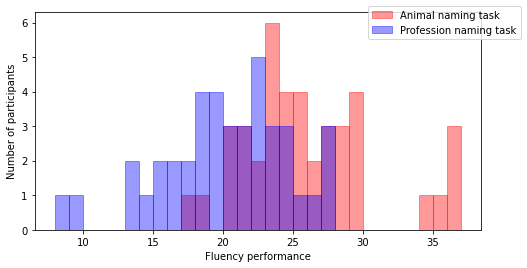

25.0
20.0


In [67]:
f = plt.figure() 
f.set_figwidth(8) 
f.set_figheight(4) 
plt.hist(animal_fluency_scores, bins=20, ec='r', color='r', alpha=0.4, label='Animal naming task')
plt.hist(profession_fluency_scores, bins=20, ec='b', color='b', alpha=0.4, label='Profession naming task')
#plt.title('Distribution of Fluency Performance')
plt.xlabel('Fluency performance')
plt.ylabel('Number of participants')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('dist fluency.svg')
plt.show()

print(np.median(animal_fluency_scores))
print(np.median(profession_fluency_scores))

In [12]:
# Creating two age groups
young_i = np.where(dataset['age_beh']<30)[0]
old_i = np.where(dataset['age_beh']>30)[0]
print(young_i, old_i)

[ 0  1  2  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19] [ 9 10 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [13]:
# Combining the ratios and scores of each participant in a 2d list
# The first ratio corresponds with the first score, the second with the second, etc.
anim_ratios_scores = [ratios_animals_2, animal_fluency_scores]
profs_ratios_scores = [ratios_professions_2, profession_fluency_scores]

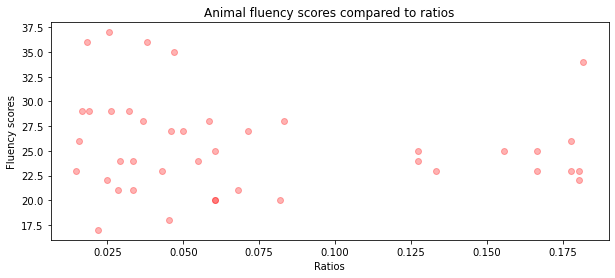

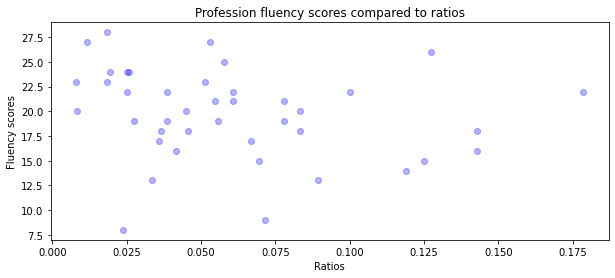

In [14]:
# To get an idea of the data we now plot the ratios against the scores.
f = plt.figure()
f.set_figwidth(10)
plt.plot(anim_ratios_scores[0], anim_ratios_scores[1], 'o', color='r', alpha=0.3)
plt.xlabel('Ratios')
plt.ylabel('Fluency scores')
plt.title("Animal fluency scores compared to ratios")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(profs_ratios_scores[0], profs_ratios_scores[1], 'o', color='b', alpha=0.3)
plt.xlabel('Ratios')
plt.ylabel('Fluency scores')
plt.title("Profession fluency scores compared to ratios")
plt.show()

To inspect the data and possible outliers:

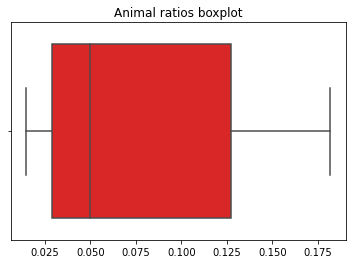

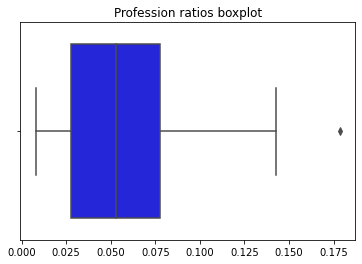

In [15]:
sns.boxplot(x=anim_ratios_scores[0], color='r', saturation=0.7)
plt.title('Animal ratios boxplot')
plt.show()

sns.boxplot(x=profs_ratios_scores[0], color='b', saturation=0.7)
plt.title('Profession ratios boxplot')
plt.show()

In [16]:
# Using the Z scores of the data to see if the outliers fall far away from the mean
z_anim = np.abs(stats.zscore(anim_ratios_scores[0]))
z_prof = np.abs(stats.zscore(profs_ratios_scores[0]))

# A Z score of 2 or more means that this data point is at least 2 standard deviations away from the mean
print("Outliers on animal task: participants", np.where(z_anim > 2)[0])
print("Outliers on profession task: participants", np.where(z_prof > 2)[0])

Outliers on animal task: participants []
Outliers on profession task: participants [11 30 34]


In [17]:
# To remove the outliers if needed (now only removes first outlier on each task):

# anim_ratios_scores_clean = anim_ratios_scores
# del anim_ratios_scores_clean[0][np.where(z_anim > 2)[0][0]]
# del anim_ratios_scores_clean[1][np.where(z_anim > 2)[0][0]]

# profs_ratios_scores_clean = profs_ratios_scores
# del profs_ratios_scores_clean[0][np.where(z_prof > 2)[0][0]]
# del profs_ratios_scores_clean[1][np.where(z_prof > 2)[0][0]]

In [18]:
# Now we plot again, excluding the outliers

# f = plt.figure()
# f.set_figwidth(10)
# plt.plot(anim_ratios_scores_clean[0], anim_ratios_scores_clean[1], 'o', color='r', alpha=0.3)
# plt.xlabel('Ratios')
# plt.ylabel('Fluency scores')
# plt.title("Animal fluency scores compared to ratios, excluding outliers")
# plt.show()

# f = plt.figure()
# f.set_figwidth(10)
# plt.plot(profs_ratios_scores_clean[0], profs_ratios_scores_clean[1], 'o', color='b', alpha=0.3)
# plt.xlabel('Ratios')
# plt.ylabel('Fluency scores')
# plt.title("Profession fluency scores compared to ratios, excluding outliers")
# plt.show()

In [19]:
# Pearson's correlation coefficient (linear relationship)
# If outliers removed: use _clean version of data

from scipy.stats import pearsonr
stat_anim, p_anim = pearsonr(anim_ratios_scores[0], anim_ratios_scores[1])
print('stat=%.3f, p=%.5f' % (stat_anim, p_anim))

stat_profs, p_profs = pearsonr(profs_ratios_scores[0], profs_ratios_scores[1])
print('stat=%.3f, p=%.5f' % (stat_profs, p_profs))

stat=-0.132, p=0.41014
stat=-0.212, p=0.18264


In [20]:
# Spearman's rank correlation (monotonic relationship)
from scipy.stats import spearmanr
stat, p = spearmanr(anim_ratios_scores[0], anim_ratios_scores[1])
print('stat=%.3f, p=%.5f' % (stat, p))

stat, p = spearmanr(profs_ratios_scores[0], profs_ratios_scores[1])
print('stat=%.3f, p=%.5f' % (stat, p))

stat=-0.183, p=0.25213
stat=-0.333, p=0.03359


In [21]:
# Kendall's rank correlation (monotonic relationship)
from scipy.stats import kendalltau
stat, p = kendalltau(anim_ratios_scores[0], anim_ratios_scores[1])
print('stat=%.3f, p=%.5f' % (stat, p))

stat, p = kendalltau(profs_ratios_scores[0], profs_ratios_scores[1])
print('stat=%.3f, p=%.5f' % (stat, p))

stat=-0.135, p=0.22714
stat=-0.227, p=0.04129


In [22]:
# scipy.optimize.curve_fit
import scipy 

def func(x, a, b, c):
    return a*x**2+b*x+c

poptA, pcovA = scipy.optimize.curve_fit(func, anim_ratios_scores[0], anim_ratios_scores[1])
poptF, pcovF = scipy.optimize.curve_fit(func, profs_ratios_scores[0], profs_ratios_scores[1])

print(pcovA)
print(pcovF)

[[ 1.20150008e+05 -2.37584149e+04  7.11366969e+02]
 [-2.37584149e+04  4.87522718e+03 -1.53723016e+02]
 [ 7.11366969e+02 -1.53723016e+02  5.74434073e+00]]
[[ 1.25158368e+05 -2.02533495e+04  5.61624637e+02]
 [-2.02533495e+04  3.57112395e+03 -1.08598964e+02]
 [ 5.61624637e+02 -1.08598964e+02  4.06911523e+00]]


In [23]:
# Now we thoroughly analyse this data by training an (OLS) linear regression model
print("Animals:")
x_anim = sm.add_constant(np.array(anim_ratios_scores[0]))
y_anim = np.array(anim_ratios_scores[1])
model_anim = sm.OLS(y_anim, x_anim)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
x_profs = sm.add_constant(np.array(profs_ratios_scores[0]))
y_profs = np.array(profs_ratios_scores[1])
model_profs = sm.OLS(y_profs, x_profs)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6932
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.410
Time:                        11:23:27   Log-Likelihood:                -122.08
No. Observations:                  41   AIC:                             248.2
Df Residuals:                      39   BIC:                             251.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3591      1.247     21.139

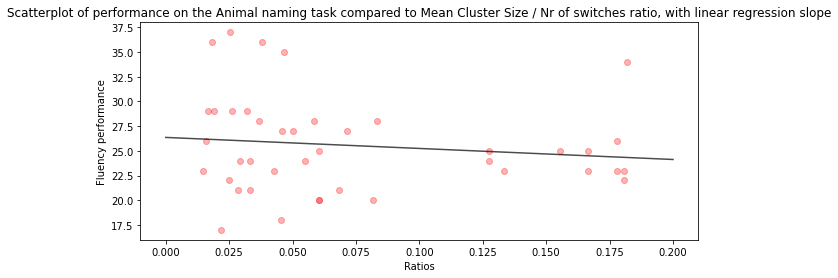

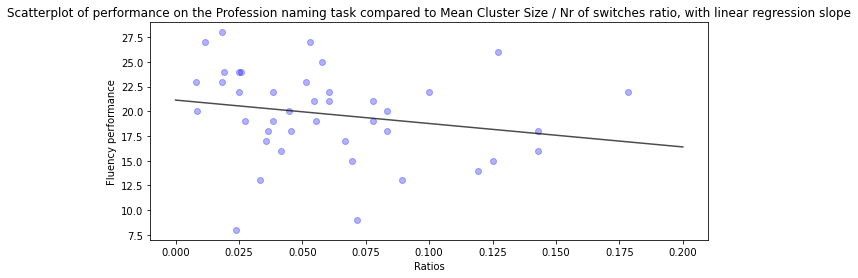

In [24]:
# Now we plot again but with the linear regression model's predicted lines
from matplotlib.lines import Line2D

fig,ax = plt.subplots()
fig.set_figwidth(10)
plt.plot(anim_ratios_scores[0], anim_ratios_scores[1], 'o', color='r', alpha=0.3)
plt.xlabel('Ratios')
plt.ylabel('Fluency performance')
plt.title("Scatterplot of performance on the Animal naming task compared to Mean Cluster Size / Nr of switches ratio, with linear regression slope")
x = np.arange(0, 0.3, 0.1).tolist()
y = results_anim.params[0] + x*np.array(results_anim.params[1])
ax.add_line(Line2D(x, y, color='black', alpha=0.7))
plt.show()

fig,ax = plt.subplots()
fig.set_figwidth(10)
plt.plot(profs_ratios_scores[0], profs_ratios_scores[1], 'o', color='b', alpha=0.3)
plt.xlabel('Ratios')
plt.ylabel('Fluency performance')
plt.title("Scatterplot of performance on the Profession naming task compared to Mean Cluster Size / Nr of switches ratio, with linear regression slope")
x = [np.arange(0, 0.3, 0.1).tolist()]
y = results_profs.params[0] + x*np.array(results_profs.params[1])
ax.add_line(Line2D(x, y, color='black', alpha=0.7))
plt.show()

#OLS.get_distribution()?

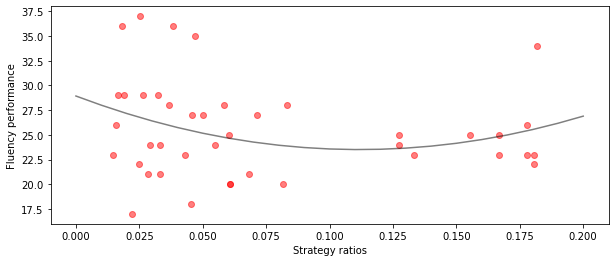

[433.97521674 -96.97931677  28.92853111]


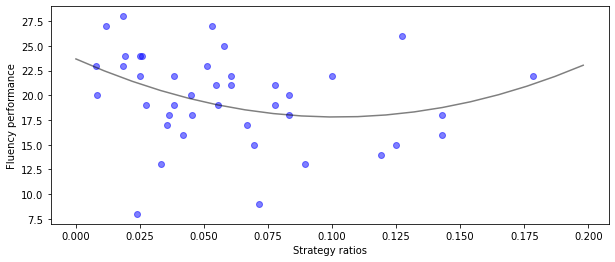

[ 566.54850851 -115.39417055   23.68007726]


In [50]:
# Trying out non-linear fits
fig,ax = plt.subplots()
fig.set_figwidth(10)
plt.plot(anim_ratios_scores[0], anim_ratios_scores[1], 'o', color='r', alpha=0.5)
plt.xlabel('Strategy ratios')
plt.ylabel('Fluency performance')
#plt.title("Fitted quadratic slope on Animal naming task comparing fluency scores with Mean Cluster Sizes / Number of Switches")
x = np.arange(0, 0.21, 0.01).tolist()
y = []
for i in range(len(x)):
    y.append(x[i]**2*poptA[0] + x[i]*poptA[1] + poptA[2])
ax.add_line(Line2D(x, y, color='black', alpha=0.5))
plt.savefig("quadratic slope animal.svg")
plt.show()
print(poptA)

fig,ax = plt.subplots()
fig.set_figwidth(10)
plt.plot(profs_ratios_scores[0], profs_ratios_scores[1], 'o', color='b', alpha=0.5)
plt.xlabel('Strategy ratios')
plt.ylabel('Fluency performance')
#plt.title("Fitted quadratic slope on Profession naming task comparing fluency scores with Mean Cluster Sizes / Number of Switches")
x = np.arange(0, 0.2, 0.011).tolist()
y = []
for i in range(len(x)):
    y.append(x[i]**2*poptF[0] + x[i]*poptF[1] + poptF[2])
ax.add_line(Line2D(x, y, color='black', alpha=0.5))
plt.savefig("quadratic slope profession.svg")
plt.show()
print(poptF)

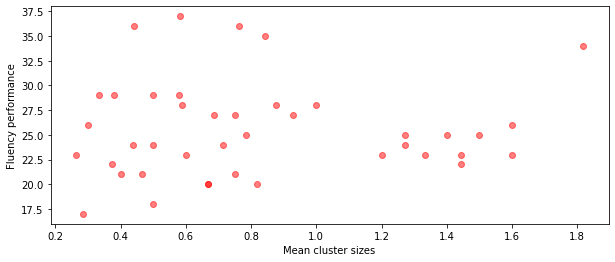

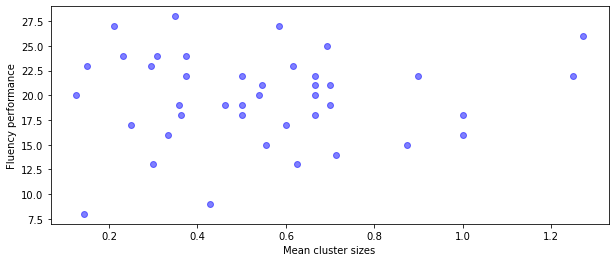

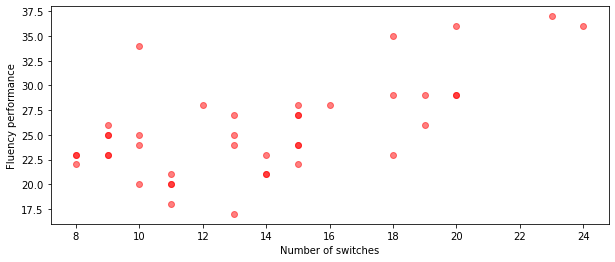

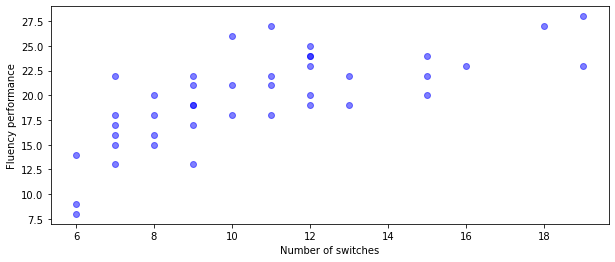

Animals
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.30e-21
Time:                        11:51:16   Log-Likelihood:                -71.166
No. Observations:                  41   AIC:                             148.3
Df Residuals:                      38   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4362      1.560     -3.485 

In [53]:
# Checking if Troyer et al. was correct: individually more clustering -> better performance AND more switching -> better performance
f = plt.figure()
f.set_figwidth(10)
plt.plot(mean_cluster_sizes_animals_2, anim_ratios_scores[1], 'o', color='r', alpha=0.5)
plt.xlabel('Mean cluster sizes')
plt.ylabel('Fluency performance')
#plt.title("Scatterplot of fluency performance and mean cluster sizes")
plt.savefig("troyer animal mcs.svg")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(mean_cluster_sizes_professions_2, profs_ratios_scores[1], 'o', color='b', alpha=0.5)
plt.xlabel('Mean cluster sizes')
plt.ylabel('Fluency performance')
#plt.title("Scatterplot of Profession naming fluency performance and mean cluster sizes")
plt.savefig("troyer profession mcs.svg")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(switches_animals_2, anim_ratios_scores[1], 'o', color='r', alpha=0.5)
plt.xlabel('Number of switches')
plt.ylabel('Fluency performance')
#plt.title("Scatterplot of Animal naming fluency performance and number of switches")
plt.savefig("troyer animal switches.svg")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(switches_professions_2, profs_ratios_scores[1], 'o', color='b', alpha=0.5)
plt.xlabel('Number of switches')
plt.ylabel('Fluency performance')
#plt.title("Scatterplot of Profession naming fluency performance and number of switches")
plt.savefig("troyer profession switches.svg")
plt.show()

# OLS on this
X_anim = np.column_stack((mean_cluster_sizes_animals_2, switches_animals_2))
X_anim = sm.add_constant(X_anim)

X_profs = np.column_stack((mean_cluster_sizes_professions_2, switches_professions_2))
X_profs = sm.add_constant(X_profs)

print("Animals")
y_anim = anim_ratios_scores[1]
model_anim = sm.OLS(y_anim, X_anim)
results_anim = model_anim.fit()
print(results_anim.summary())
print(results_anim.pvalues)

print("Professions")
y_profs = profs_ratios_scores[1]
model_profs = sm.OLS(y_profs, X_profs)
results_profs = model_profs.fit()
print(results_profs.summary())
print(results_profs.pvalues)


In [27]:
# plot with regression lines
# THIS DOES NOT MAKE SENSE UNLESS IT COULD FIT IN ONE PLOT PER TASK (BUT THIS WOULD LEAD TO WEIRD AXES)

# fig,ax = plt.subplots()
# fig.set_figwidth(10)
# plt.plot(mean_cluster_sizes_animals_2, anim_ratios_scores[1], 'o', color='r', alpha=0.3)
# plt.xlabel('Mean cluster sizes')
# plt.ylabel('Fluency scores')
# plt.title("Animal fluency scores compared to mean cluster sizes, with linear regression slope")
# x = np.arange(0.9, 4.3, 0.1).tolist()
# y = results_anim.params[0] + x*np.array(results_anim.params[1]) + x*np.array(results_anim.params[2])
# ax.add_line(Line2D(x, y, color='black', alpha=0.7))
# plt.show()

# fig,ax = plt.subplots()
# fig.set_figwidth(10)
# plt.plot(mean_cluster_sizes_professions_2, profs_ratios_scores[1], 'o', color='b', alpha=0.3)
# plt.xlabel('Mean cluster sizes')
# plt.ylabel('Fluency scores')
# plt.title("Profession fluency scores compared to mean cluster sizes, with linear regression slope")
# x = np.arange(0.9, 3.2, 0.1).tolist()
# y = results_profs.params[0] + x*np.array(results_profs.params[1]) + x*np.array(results_profs.params[2])
# ax.add_line(Line2D(x, y, color='black', alpha=0.7))
# plt.show()

# fig,ax = plt.subplots()
# fig.set_figwidth(10)
# plt.plot(switches_animals_2, anim_ratios_scores[1], 'o', color='r', alpha=0.3)
# plt.xlabel('Number of switches')
# plt.ylabel('Fluency scores')
# plt.title("Animal fluency scores compared to number of switches, with linear regression slope")
# x = np.arange(1.9, 7.2, 0.1).tolist()
# y = results_anim.params[0] + x*np.array(results_anim.params[1]) + x*np.array(results_anim.params[2])
# ax.add_line(Line2D(x, y, color='black', alpha=0.7))
# plt.show()

# fig,ax = plt.subplots()
# fig.set_figwidth(10)
# plt.plot(switches_professions_2, profs_ratios_scores[1], 'o', color='b', alpha=0.3)
# plt.xlabel('Number of switches')
# plt.ylabel('Fluency scores')
# plt.title("Profession fluency scores compared to number of switches, with linear regression slope")
# x = np.arange(-0.1, 6.2, 0.1).tolist()
# y = results_profs.params[0] + x*np.array(results_profs.params[1]) + x*np.array(results_profs.params[2])
# ax.add_line(Line2D(x, y, color='black', alpha=0.7))
# plt.show()


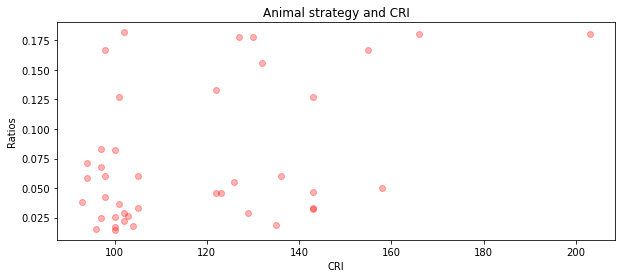

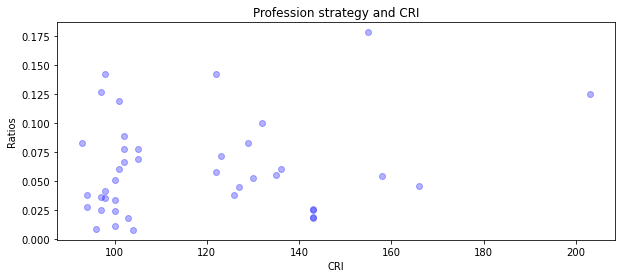

In [28]:
# CRI and strategy
f = plt.figure()
f.set_figwidth(10)
plt.plot(dataset.loc[:, "CRIQ_total_v2"], anim_ratios_scores[0], 'o', color='r', alpha=0.3)
plt.xlabel('CRI')
plt.ylabel('Ratios')
plt.title("Animal strategy and CRI")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(dataset.loc[:, "CRIQ_total_v2"], profs_ratios_scores[0], 'o', color='b', alpha=0.3)
plt.xlabel('CRI')
plt.ylabel('Ratios')
plt.title("Profession strategy and CRI")
plt.show()

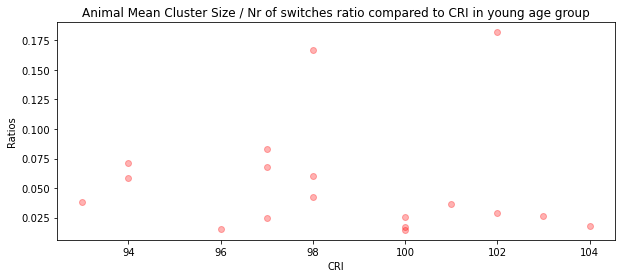

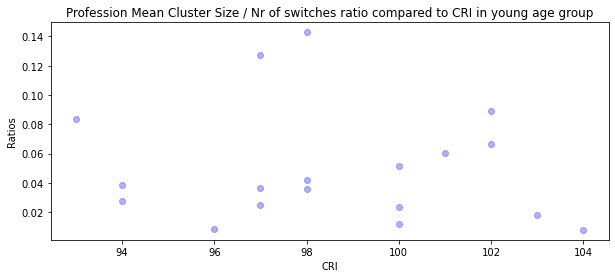

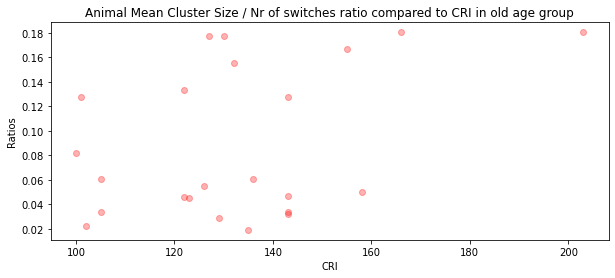

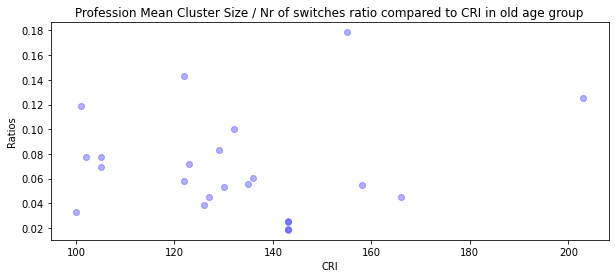

In [29]:
# split over age
youngCRI = []
youngstratA = []
youngstratP = []
oldCRI = []
oldstratA = []
oldstratP = []
for i in range(len(dataset.loc[:, "CRIQ_total_v2"])):
    if i in young_i:
        youngCRI.append(dataset.loc[:, "CRIQ_total_v2"][i])
        youngstratA.append(anim_ratios_scores[0][i])
        youngstratP.append(profs_ratios_scores[0][i])
    elif i in old_i:
        oldCRI.append(dataset.loc[:, "CRIQ_total_v2"][i])
        oldstratA.append(anim_ratios_scores[0][i])
        oldstratP.append(profs_ratios_scores[0][i])

# young
f = plt.figure()
f.set_figwidth(10)
plt.plot(youngCRI, youngstratA, 'o', color='r', alpha=0.3)
plt.xlabel('CRI')
plt.ylabel('Ratios')
plt.title("Animal Mean Cluster Size / Nr of switches ratio compared to CRI in young age group")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(youngCRI, youngstratP, 'o', color='b', alpha=0.3)
plt.xlabel('CRI')
plt.ylabel('Ratios')
plt.title("Profession Mean Cluster Size / Nr of switches ratio compared to CRI in young age group")
plt.show()

# old
f = plt.figure()
f.set_figwidth(10)
plt.plot(oldCRI, oldstratA, 'o', color='r', alpha=0.3)
plt.xlabel('CRI')
plt.ylabel('Ratios')
plt.title("Animal Mean Cluster Size / Nr of switches ratio compared to CRI in old age group")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(oldCRI, oldstratP, 'o', color='b', alpha=0.3)
plt.xlabel('CRI')
plt.ylabel('Ratios')
plt.title("Profession Mean Cluster Size / Nr of switches ratio compared to CRI in old age group")
plt.show()

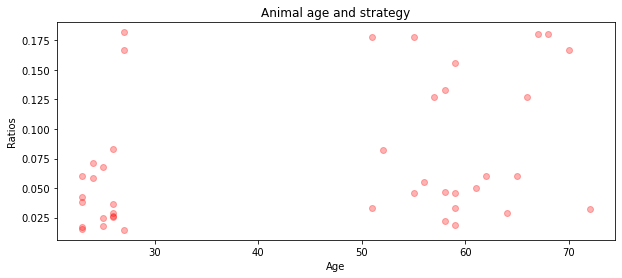

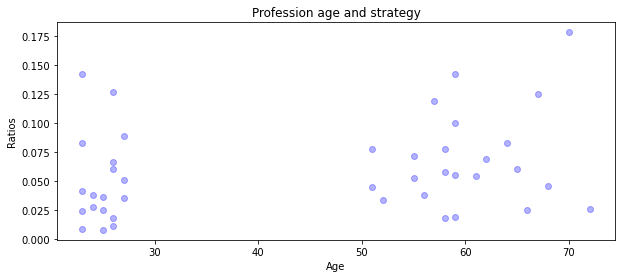

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.699
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0363
Time:                        11:23:34   Log-Likelihood:                 61.796
No. Observations:                  41   AIC:                            -119.6
Df Residuals:                      39   BIC:                            -116.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.023      1.196

In [30]:
# Age and strategy
# maybe makes more sense to use the two groups instead of plotting like this
# todo: add means for young group and old group?
# todo: add boxplots for both groups
f = plt.figure()
f.set_figwidth(10)
plt.plot(dataset.loc[:, "age_beh"], anim_ratios_scores[0], 'o', color='r', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Ratios')
plt.title("Animal age and strategy")
plt.show()

f = plt.figure()
f.set_figwidth(10)
plt.plot(dataset.loc[:, "age_beh"], profs_ratios_scores[0], 'o', color='b', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Ratios')
plt.title("Profession age and strategy")
plt.show()

# Older age = more varied strategy usage?

# OLS on if age influences strategy
X = dataset[["age_beh"]]
X = sm.add_constant(X)

print("Animals:")
y_anim = np.array(anim_ratios_scores[0])
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = np.array(profs_ratios_scores[0])
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

In [31]:
# multiple linear regression
X = dataset[["CRIQ_total_v2", "age_beh"]]
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[0]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[0]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.091
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0246
Time:                        11:23:34   Log-Likelihood:                 63.461
No. Observations:                  41   AIC:                            -120.9
Df Residuals:                      38   BIC:                            -115.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0415      0.044  

In [32]:
# also OLS on CRI the two age groups
dataset['age_group'] = np.where((dataset['age_beh']<30), 0, 1)
X = dataset[["CRIQ_total_v2", "age_group"]]
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[0]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[0]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.096
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0245
Time:                        11:23:34   Log-Likelihood:                 63.466
No. Observations:                  41   AIC:                            -120.9
Df Residuals:                      38   BIC:                            -115.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0390      0.048  

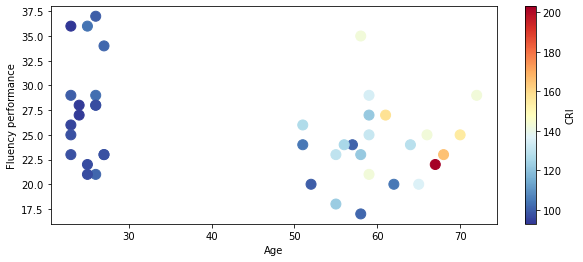

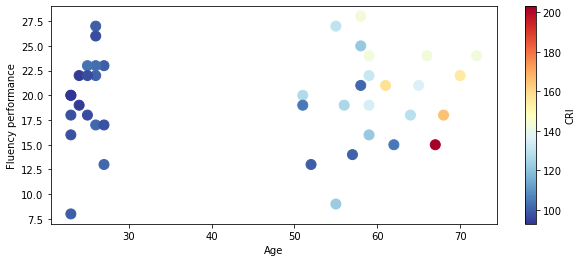

In [54]:
cm = plt.cm.get_cmap('RdYlBu_r')

f = plt.figure()
f.set_figwidth(10)
sc = plt.scatter(dataset.loc[:, "age_beh"], anim_ratios_scores[1], c=dataset.loc[:, "CRIQ_total_v2"], s=100, cmap=cm)
plt.colorbar(sc, label="CRI")
plt.xlabel('Age')
plt.ylabel('Fluency performance')
#plt.title("Color coded scatterplot of age and fluency performance")
plt.savefig("fluency age cri animal.svg")
plt.show()

f = plt.figure()
f.set_figwidth(10)
sc2 = plt.scatter(dataset.loc[:, "age_beh"], profs_ratios_scores[1], c=dataset.loc[:, "CRIQ_total_v2"], s=100, cmap=cm)
plt.colorbar(sc2, label="CRI")
plt.xlabel('Age')
plt.ylabel('Fluency performance')
#plt.title("Color coded scatterplot of age and fluency performance")
plt.savefig("fluency age cri profession.svg")
plt.show()

In [34]:
# age groups OLS
df = pd.DataFrame(dataset)
Moderator = df.age_beh * df.CRIQ_total_v2

#X = np.column_stack((df.age_beh, df.CRIQ_total_v2, Moderator))
X = df.age_group
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[1]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[1]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     6.287
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0164
Time:                        11:23:36   Log-Likelihood:                -119.37
No. Observations:                  41   AIC:                             242.7
Df Residuals:                      39   BIC:                             246.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5556      1.075     25.631

In [35]:
# CRIQ as moderator (https://scholar.harvard.edu/sigou-interdisciplinary-blog/regression-moderator-101)
df = pd.DataFrame(dataset)
Moderator = df.age_beh * df.CRIQ_total_v2

X = np.column_stack((df.age_beh, df.CRIQ_total_v2, Moderator))
#X = df.age_group
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[1]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[1]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.547
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0707
Time:                        11:23:36   Log-Likelihood:                -118.59
No. Observations:                  41   AIC:                             245.2
Df Residuals:                      37   BIC:                             252.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4078     27.668      0.340

# Starting here are the tests for CRI as mediator variable for the interaction between age and fluency performance.

In [36]:
# step 1
df = pd.DataFrame(dataset)
X = df.age_group
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[1]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[1]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     6.287
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0164
Time:                        11:23:36   Log-Likelihood:                -119.37
No. Observations:                  41   AIC:                             242.7
Df Residuals:                      39   BIC:                             246.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5556      1.075     25.631

In [37]:
# step 2
df = pd.DataFrame(dataset)
X = df.age_group
X = sm.add_constant(X)

y = df.CRIQ_total_v2
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          CRIQ_total_v2   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     35.66
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.67e-07
Time:                        11:23:36   Log-Likelihood:                -175.88
No. Observations:                  41   AIC:                             355.8
Df Residuals:                      39   BIC:                             359.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.5556      4.266     23.104      0.0

In [38]:
# step 3
df = pd.DataFrame(dataset)
X = df.CRIQ_total_v2
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[1]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[1]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7080
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.405
Time:                        11:23:36   Log-Likelihood:                -122.07
No. Observations:                  41   AIC:                             248.1
Df Residuals:                      39   BIC:                             251.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.6199      3.742  

In [39]:
# step 4
df = pd.DataFrame(dataset)
X = np.column_stack((df.age_group, df.CRIQ_total_v2))
X = sm.add_constant(X)

print("Animals:")
y_anim = anim_ratios_scores[1]
model_anim = sm.OLS(y_anim, X)
results_anim = model_anim.fit()
print(results_anim.summary())

print("Professions:")
y_profs = profs_ratios_scores[1]
model_profs = sm.OLS(y_profs, X)
results_profs = model_profs.fit()
print(results_profs.summary())

Animals:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.843
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0302
Time:                        11:23:36   Log-Likelihood:                -118.66
No. Observations:                  41   AIC:                             243.3
Df Residuals:                      38   BIC:                             248.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9649      4.102      5.598